In [2]:
from star import electron
import matplotlib.pyplot as plt

## Stopping powers only, for user-selected energy grid

In [3]:
hydrogen = electron.PredefinedMaterials.HYDROGEN
# use default energy grid
data = electron.calculate_stopping_power(hydrogen)

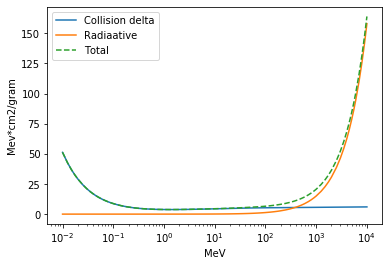

In [9]:
plt.plot(data["energy"], data["stopping_power_collision_delta"], label="Collision delta")
plt.plot(data["energy"], data["stopping_power_radiative"], label="Radiaative")
plt.plot(data["energy"], data["stopping_power_total"], "--", label="Total")
plt.xscale("log")
plt.xlabel("MeV")
plt.ylabel("Mev*cm2/gram")
plt.legend();

In [ ]:
# use custom energy
data = electron.calculate_stopping_power(hydrogen, energy=[1e2,2e2,3e2])

## Stopping powers, ranges and radiation yields for standard energy grid

In [ ]:
hydrogen = electron.PredefinedMaterials.HYDROGEN
data = star.electron.calculate_estar_table()

In [4]:
import tabulate
from IPython.core.display import HTML
table = tabulate.tabulate(data, headers=(data.dtype.names), tablefmt="html")
HTML(table)

energy,stopping_power_collision_delta,stopping_power_radiative,stopping_power_total,csda_range,radiation_yield,density_effect
0.01,51.2428,0.000970212,51.2437,9.74455e-05,9.32591e-06,0
0.0125,42.708,0.000979289,42.709,0.000146196,1.12645e-05,0
0.015,36.8147,0.000988091,36.8157,0.000203529,1.31491e-05,0
0.0175,32.4859,0.000996384,32.4869,0.000269132,1.49922e-05,0
0.02,29.1637,0.00100432,29.1647,0.000342736,1.68014e-05,0
0.025,24.3853,0.00101944,24.3864,0.000513752,2.03698e-05,0
0.03,21.1029,0.00103379,21.1039,0.000714141,2.38381e-05,0
0.035,18.7022,0.00104773,18.7033,0.000942485,2.72281e-05,0
0.04,16.8668,0.00106125,16.8678,0.00119754,3.05533e-05,0
0.045,15.416,0.0010745,15.4171,0.00147817,3.38226e-05,0


## Using custom materials

Create your material use dataclass `MaterialParameters` or override parametrs of exist material

In [1]:
from star import electron
override_hydrogen = electron.load_material(electron.PredefinedMaterials.HYDROGEN)
override_hydrogen.ionisation_potential = 100 # eV

## Get source data

In [20]:
import tables
import matplotlib.pyplot as plt
# import star

In [21]:
with tables.open_file("/home/zelenyy/npm/git/nist-calculator/star/data/NIST_ESTAR.hdf5") as h5file:
    table = h5file.get_node("/", "material_parameters")
    data = table.read()
    print(data[5])
    print(data[102])
    composition = h5file.get_node("/composition", "M103").read()
    print(composition)


(6, b'AMORPHOUS_CARBON', 1, 0.499542, 81., 2.)
(103, b'ADIPOSE_TISSUE_(ICRP)', 13, 0.558468, 63.2, 0.92)
[( 1, 0) ( 6, 0) ( 7, 0) ( 8, 0) (11, 0) (12, 0) (15, 0) (16, 0) (17, 0)
 (19, 0) (20, 0) (26, 0) (30, 0)]


In [22]:
print(data[electron.PredefinedMaterials.A_150_TISSUE_EQUIVALENT_PLASTIC.value-1])


(99, b'A-150_TISSUE-EQUIVALENT_PLASTIC', 6, 0.549031, 65.1, 1.127)


In [5]:
print(data)

[(  1, b'HYDROGEN',  1, 0.992162,  19.2, 8.37480e-05)
 (  2, b'HELIUM',  1, 0.499675,  41.8, 1.66322e-04)
 (  3, b'LITHIUM',  1, 0.432214,  40. , 5.34000e-01)
 (  4, b'BERYLLIUM',  1, 0.443844,  63.7, 1.84800e+00)
 (  5, b'BORON',  1, 0.462535,  76. , 2.37000e+00)
 (  6, b'AMORPHOUS_CARBON',  1, 0.499542,  81. , 2.00000e+00)
 (  7, b'NITROGEN',  1, 0.499761,  82. , 1.16528e-03)
 (  8, b'OXYGEN',  1, 0.500019,  95. , 1.33151e-03)
 (  9, b'FLUORINE',  1, 0.473724, 115. , 1.58029e-03)
 ( 10, b'NEON',  1, 0.495565, 137. , 8.38505e-04)
 ( 11, b'SODIUM',  1, 0.478474, 149. , 9.71000e-01)
 ( 12, b'MAGNESIUM',  1, 0.493726, 156. , 1.74000e+00)
 ( 13, b'ALUMINUM',  1, 0.481811, 166. , 2.69890e+00)
 ( 14, b'SILICON',  1, 0.498478, 173. , 2.33000e+00)
 ( 15, b'PHOSPHORUS',  1, 0.484281, 173. , 2.20000e+00)
 ( 16, b'SULFUR',  1, 0.499064, 180. , 2.00000e+00)
 ( 17, b'CHLORINE',  1, 0.479508, 174. , 2.99473e-03)
 ( 18, b'ARGON',  1, 0.450586, 188. , 1.66201e-03)
 ( 19, b'POTASSIUM',  1, 0.485955, 1